In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler  # Normalization
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder  # Encoding categorical data

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression  
from sklearn.cluster import KMeans   

from sklearn.metrics import accuracy_score, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from collections import Counter

%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\codes\Datasets\penguins.csv")
df.head()
# Imported dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
print(df.count())
df.isna().sum()
# We see that the number of NULL values as compared to the total values in each column is low. Hence, we will drop the NULL values
# from the dataset.

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.count()
# Dropped NULL values.

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
year                 333
dtype: int64

In [5]:
df.describe()
# Descriptive statistics of the dataset

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
df.columns
# For a better understandinng of the data.

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
# We will Convert the categorical values of "SEX", "ISLAND" and "SPECIES" into numerical values using Label Encoding
# The index of the category in the list is the label for that category in the dataset
le_species = LabelEncoder()
le_sex = LabelEncoder()
le_island = LabelEncoder()

df['species'] = le_species.fit_transform(df['species'])
df['sex'] = le_sex.fit_transform(df['sex'])
df['island'] = le_island.fit_transform(df['island'])

print("The Labels for species:\n", list(le_species.classes_))
print("The Labels for sex:\n", list(le_sex.classes_))
print("The Labels for island:\n", list(le_island.classes_))

df.head()

The Labels for species:
 ['Adelie', 'Chinstrap', 'Gentoo']
The Labels for sex:
 ['female', 'male']
The Labels for island:
 ['Biscoe', 'Dream', 'Torgersen']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,2007
1,0,2,39.5,17.4,186.0,3800.0,0,2007
2,0,2,40.3,18.0,195.0,3250.0,0,2007
4,0,2,36.7,19.3,193.0,3450.0,0,2007
5,0,2,39.3,20.6,190.0,3650.0,1,2007


In [8]:
# The year is a redundant feature for this analysis, hence we can drop the feature
df.drop(columns = ['year'], inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


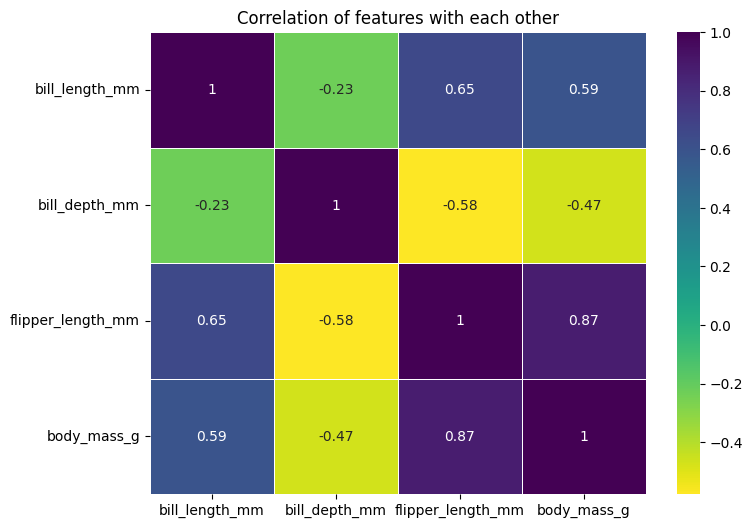

In [9]:
corr_vals = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_vals, annot = True, cmap = 'viridis_r', linewidths= 0.5)

plt.title("Correlation of features with each other")
plt.show()

# We see that some variables bear a strong correlation with one another. 
# For example, 'flipper_length_mm' and 'body_mass_g' have a correlation value of 0.87, which is quite high.
# Also, 'flipper_length_mm' and 'bill_length_mm' have a corr value of 0.65, which is fairly strong.
# To prove this, we will be carrying out further analysis between some of these features.

In [10]:
metrics = ['flipper_length_mm', 'bill_length_mm', 'bill_depth_mm']

for m in metrics:
    g0 = df[le_sex.inverse_transform(df['sex']) == 'female'][m]
    g1 = df[le_sex.inverse_transform(df['sex']) == 'male'][m]

    # variance test, ANOVA and t-test
    lev_stat, lev_p = stats.levene(g0, g1)
    anova_stat, anova_p = stats.f_oneway(g0, g1)
    equal_var = lev_p > 0.05
    t_stat, t_p = stats.ttest_ind(g0, g1, equal_var=equal_var)

    # concise summary
    sig = t_p < 0.05
    direction = "higher in male" if g1.mean() > g0.mean() else "higher in female"
    print(f"{m}: n0={len(g0)}, n1={len(g1)}, mean0={g0.mean():.2f}, mean1={g1.mean():.2f}")
    print(f"  Levene p={lev_p:.4f} -> equal_var={equal_var}")
    print(f"  ANOVA p={anova_p:.4g}")
    print(f"  T-test: t={t_stat:.3f}, p={t_p:.4g} -> {'significant' if sig else 'not significant'} ({direction})")
    print("===================================================================================")
    print()

# As seen in the tests, the flipper length, bill length and bill depth are higher in male penguins than females.

flipper_length_mm: n0=165, n1=168, mean0=197.36, mean1=204.51
  Levene p=0.0401 -> equal_var=False
  ANOVA p=2.391e-06
  T-test: t=-4.808, p=2.336e-06 -> significant (higher in male)

bill_length_mm: n0=165, n1=168, mean0=42.10, mean1=45.85
  Levene p=0.0938 -> equal_var=True
  ANOVA p=1.094e-10
  T-test: t=-6.667, p=1.094e-10 -> significant (higher in male)

bill_depth_mm: n0=165, n1=168, mean0=16.43, mean1=17.89
  Levene p=0.6895 -> equal_var=True
  ANOVA p=2.066e-12
  T-test: t=-7.307, p=2.066e-12 -> significant (higher in male)



In [11]:
ss_bill_length = StandardScaler()
ss_flipper_length = StandardScaler()
ss_bill_depth = StandardScaler()
ss_body_mass = StandardScaler()

df['bill_length_mm'] = ss_bill_length.fit_transform(df[['bill_length_mm']])
df['flipper_length_mm'] = ss_flipper_length.fit_transform(df[['flipper_length_mm']])
df['bill_depth_mm'] = ss_bill_depth.fit_transform(df[['bill_depth_mm']])
df['body_mass_g'] = ss_body_mass.fit_transform(df[['body_mass_g']])

df.head()

# For a better model, we have scaled the data into standard normal distribution.
# We will be building a Logistic Regression model to predict the species of a penguin based on all other features.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,2,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,2,-0.676280,0.424729,-0.426373,-1.190361,0
4,0,2,-1.335566,1.085877,-0.569284,-0.941606,0
5,0,2,-0.859415,1.747026,-0.783651,-0.692852,1


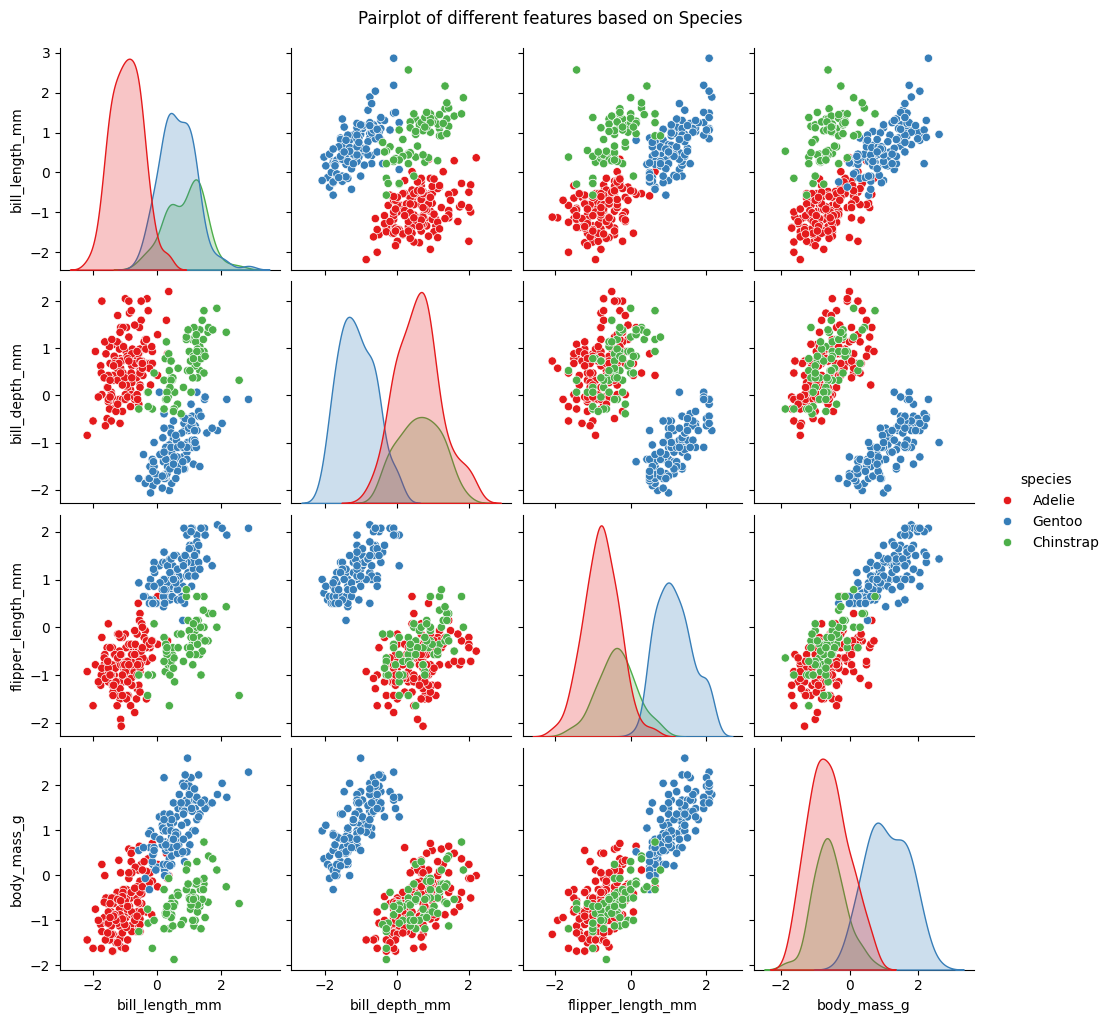

In [12]:
# To see some more insights, we can visualize the distribution of different features based on species.
df['species'] = le_species.inverse_transform(df['species'])
sns.pairplot(df, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1')
plt.suptitle("Pairplot of different features based on Species", y=1.02)
plt.show()

In [13]:
model = LogisticRegression(max_iter=200)
X = df.drop(columns = ['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 35)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy*100:.2f}%")

# In models that train and test on small datasets, Overfitting is a common problem. Here, we see that the accuracy of the model is 
# quite high (100%).
# This is most likely due to overfitting. To counter this, we can use more data for training and testing the model.
# We can also use techniques like Cross-Validation and Regularization to reduce overfitting.

Accuracy of the Logistic Regression model: 100.00%


In [14]:
model_kmeans = KMeans(n_clusters=3, random_state=42)
X_kmeans = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
model_kmeans.fit(X_kmeans)
y_kmeans_pred = model_kmeans.predict(X_kmeans)
df['kmeans_cluster'] = y_kmeans_pred

sil = silhouette_score(X_kmeans, y_kmeans_pred)
print(f"Silhouette: {sil:.4f}  (>.5 good, .25-.5 ok, <.25 weak)")

true_labels = le_species.transform(df['species'])  
ari = adjusted_rand_score(true_labels, y_kmeans_pred)
nmi = normalized_mutual_info_score(true_labels, y_kmeans_pred)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Info (NMI): {nmi:.4f}")

mapping = {}
for c in np.unique(y_kmeans_pred):
    idx = np.where(y_kmeans_pred == c)[0]
    most_common = Counter(df['species'].iloc[idx]).most_common(1)[0][0]
    mapping[c] = most_common

pred_species = np.array([mapping[c] for c in y_kmeans_pred])
purity = (pred_species == df['species'].values).mean()
print(f"Purity (mapped accuracy): {purity:.4f}")

labels = list(le_species.classes_)
print("Confusion matrix (true species rows, predicted species cols):")
print(confusion_matrix(df['species'], pred_species, labels=labels))

# As we can see, the KMeans clustering algorithm has performed quite well in 
# clustering the penguin species based on the features provided.
# Furthermore, contrary to Logistic Regression, 
# KMeans is an unsupervised learning algorithm and does not require labeled data for training. 

Silhouette: 0.4462  (>.5 good, .25-.5 ok, <.25 weak)
Adjusted Rand Index (ARI): 0.7994
Normalized Mutual Info (NMI): 0.7899
Purity (mapped accuracy): 0.9189
Confusion matrix (true species rows, predicted species cols):
[[124  22   0]
 [  5  63   0]
 [  0   0 119]]


In [17]:
df['bill_length_mm'] = ss_bill_length.inverse_transform(df[['bill_length_mm']])
df['flipper_length_mm'] = ss_flipper_length.inverse_transform(df[['flipper_length_mm']])
df['bill_depth_mm'] = ss_bill_depth.inverse_transform(df[['bill_depth_mm']])
df['body_mass_g'] = ss_body_mass.inverse_transform(df[['body_mass_g']])
df['sex'] = le_sex.inverse_transform(df['sex'])
df['island'] = le_island.inverse_transform(df['island'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kmeans_cluster
0,Adelie,Torgersen,257.496425,53.934234,2734.008531,3.019229e+06,male,0
1,Adelie,Torgersen,259.680606,51.378075,2803.982055,3.059429e+06,female,0
2,Adelie,Torgersen,264.048966,52.557841,2929.934398,2.617226e+06,female,0
4,Adelie,Torgersen,244.391343,55.114000,2901.944988,2.778027e+06,female,0
5,Adelie,Torgersen,258.588515,57.670159,2859.960874,2.938828e+06,male,0
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,348.685956,56.097138,3097.870855,3.220230e+06,male,2
340,Chinstrap,Dream,281.522409,52.754468,3027.897331,2.737827e+06,female,2
341,Chinstrap,Dream,314.831160,52.951096,2901.944988,3.039329e+06,male,2
342,Chinstrap,Dream,321.383701,54.524117,3139.854969,3.300631e+06,male,2
